  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=c3222304c32a06f4e13104d4530c0aa8382f5b95d84b903aaac8257c8cb90995
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql

--- df_itens_pedido ---
Valores nulos antes: 0
Duplicatas antes: 0
Valores nulos depois: 0
Duplicatas depois: 0

--- df_pagamentos ---
Valores nulos antes: 0
Duplicatas antes: 0
Valores nulos depois: 0
Duplicatas depois: 0

--- df_avaliacoes ---
Valores nulos antes: 145903
Duplicatas antes: 0
Valores nulos depois: 0
Duplicatas depois: 0

--- df_produtos ---
Valores nulos antes: 2448
Duplicatas antes: 0
Valores nulos depois: 0
Duplicatas depois: 0

--- Outros DataFrames ---
Nulos em df_clientes: 0
Duplicatas em df_clientes: 0
Nulos em df_geolocation: 0
Duplicatas em df_geolocation: 261831
Nulos em df_pedidos: 4908
Duplicatas em df_pedidos: 0
Nulos em df_vendedor

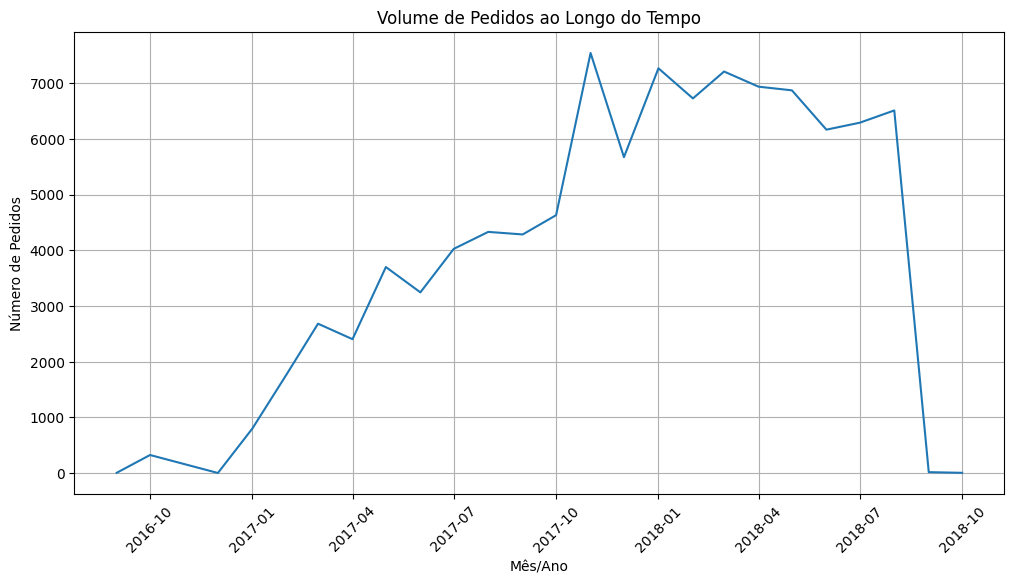

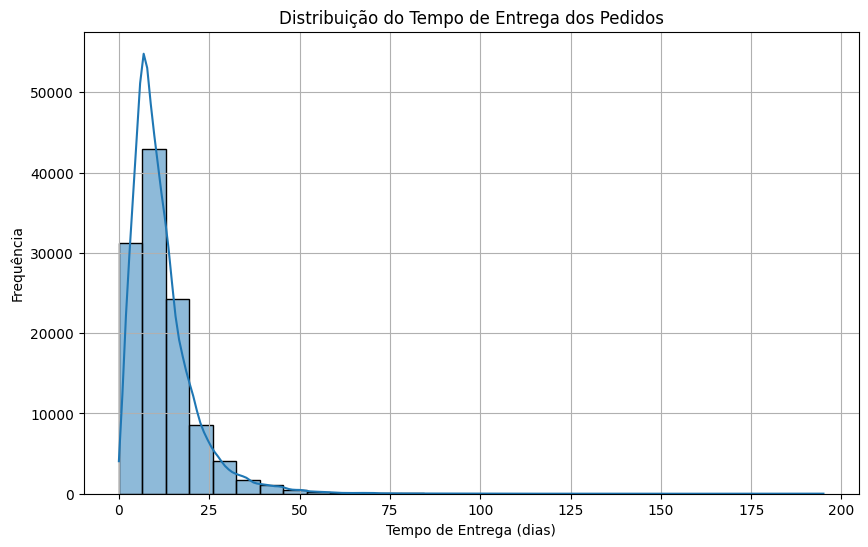


--- Estatísticas Descritivas do Tempo de Entrega ---
count    115047.000000
mean         12.015342
std           9.425728
min           0.000000
25%           6.000000
50%          10.000000
75%          15.000000
max         195.000000
Name: delivery_time, dtype: float64


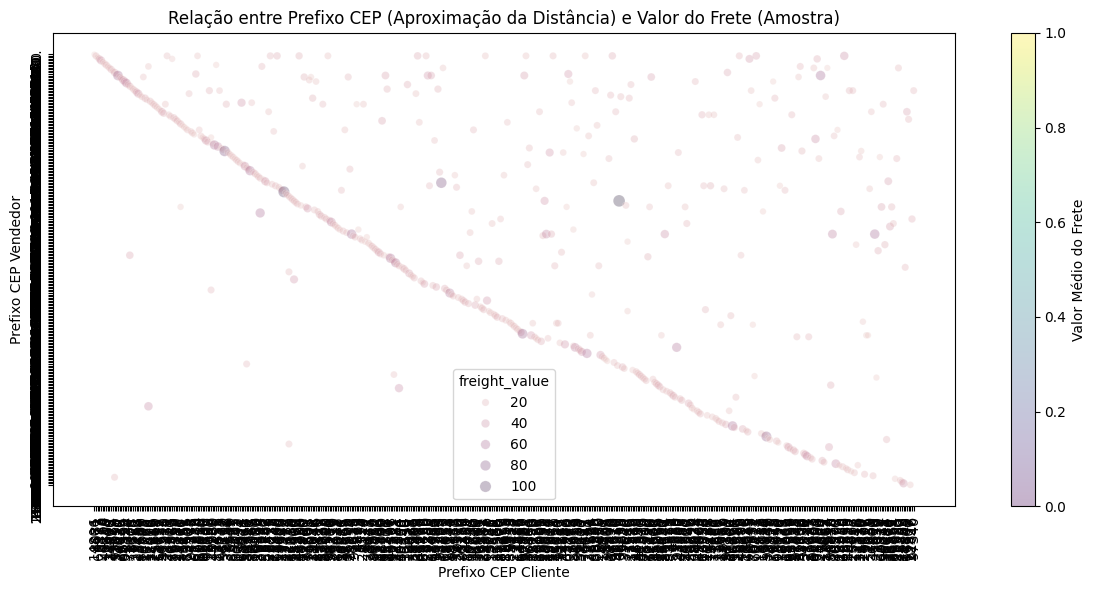


--- Correlação entre Valor do Frete e Prefixos de CEP ---
                          freight_value  customer_zip_code_prefix  \
freight_value                  1.000000                  0.225448   
customer_zip_code_prefix       0.225448                  1.000000   
seller_zip_code_prefix         0.152244                  0.075506   

                          seller_zip_code_prefix  
freight_value                           0.152244  
customer_zip_code_prefix                0.075506  
seller_zip_code_prefix                  1.000000  

--- Faturamento por Categoria de Produto (Python) ---
   product_category_name  faturamento_total
0          health_beauty         1393010.15
1          watches_gifts         1308511.10
2         bed_bath_table         1293400.65
3  computers_accessories         1167296.08
4         sports_leisure         1121159.19
5        furniture_decor          970602.86
6             housewares          790278.17
7                   auto          690938.75
8        

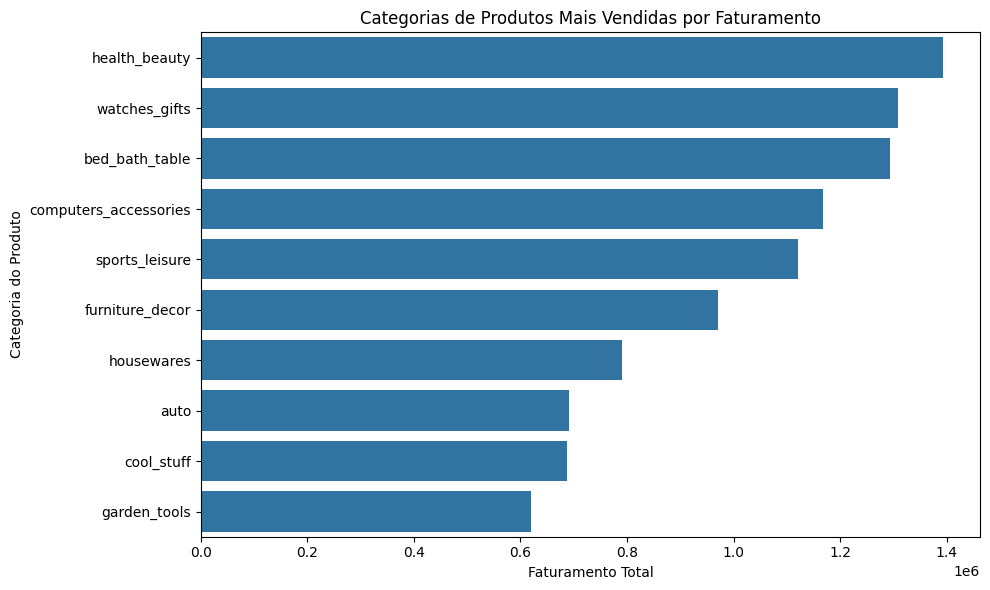


--- Valor Médio do Pedido por Estado (Python) ---
  customer_state  valor_medio_pedido
0             PB          236.882723
1             AC          219.594737
2             AL          217.203079
3             TO          205.612124
4             RO          205.180070
5             RN          201.456643
6             PA          200.975744
7             PI          200.084363
8             AP          196.635595
9             RR          193.550385


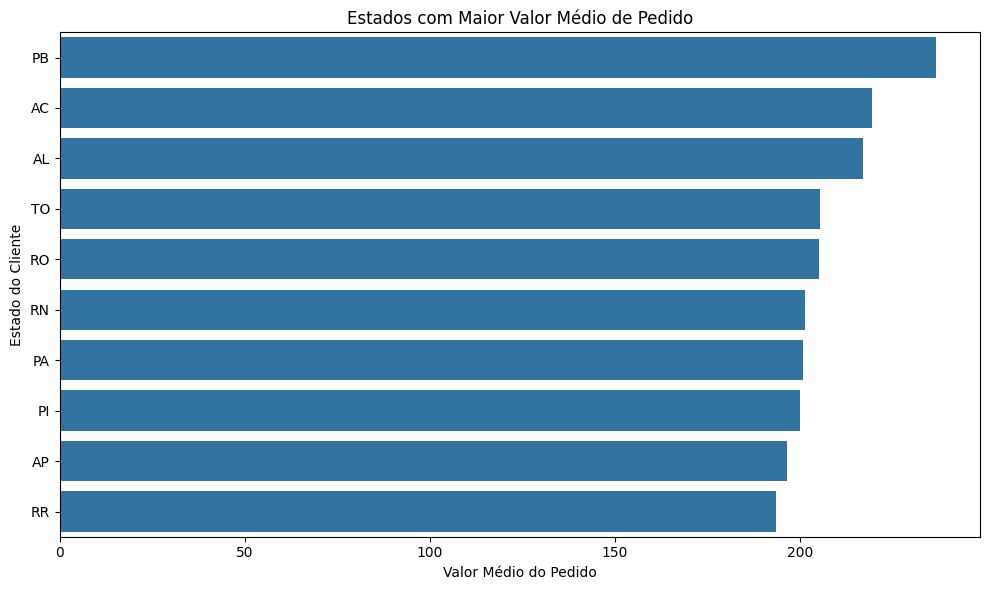

In [2]:
!pip install pandasql
import pandas as pd
import numpy as np
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns

# Para usar o sqldf, precisamos passar o DataFrame global para a função
pysqldf = lambda q: sqldf(q, globals())

# Caminhos dos arquivos
caminho_clientes = '/content/drive/MyDrive/teste/olist_customers_dataset.csv'
caminho_geolocation = '/content/drive/MyDrive/teste/olist_geolocation_dataset.csv'
caminho_itens_pedido = '/content/drive/MyDrive/teste/olist_order_items_dataset.csv'
caminho_pagamentos = '/content/drive/MyDrive/teste/olist_order_payments_dataset.csv'
caminho_avaliacoes = '/content/drive/MyDrive/teste/olist_order_reviews_dataset.csv'
caminho_pedidos = '/content/drive/MyDrive/teste/olist_orders_dataset.csv'
caminho_produtos = '/content/drive/MyDrive/teste/olist_products_dataset.csv'
caminho_vendedores = '/content/drive/MyDrive/teste/olist_sellers_dataset.csv'
caminho_traducao = '/content/drive/MyDrive/teste/product_category_name_translation.csv'

# 1. Preparação dos Dados
# Importar os arquivos CSV
df_clientes = pd.read_csv(caminho_clientes)
df_geolocation = pd.read_csv(caminho_geolocation)
df_itens_pedido = pd.read_csv(caminho_itens_pedido)
df_pagamentos = pd.read_csv(caminho_pagamentos)
df_avaliacoes = pd.read_csv(caminho_avaliacoes)
df_pedidos = pd.read_csv(caminho_pedidos)
df_produtos = pd.read_csv(caminho_produtos)
df_vendedores = pd.read_csv(caminho_vendedores)
df_traducao = pd.read_csv(caminho_traducao)

# Realizar a limpeza necessária
def data_cleaning(df, df_name):
    print(f"\n--- {df_name} ---")
    print("Valores nulos antes:", df.isnull().sum().sum())
    print("Duplicatas antes:", df.duplicated().sum())
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    print("Valores nulos depois:", df.isnull().sum().sum())
    print("Duplicatas depois:", df.duplicated().sum())
    return df

df_itens_pedido = data_cleaning(df_itens_pedido.copy(), "df_itens_pedido")
df_pagamentos = data_cleaning(df_pagamentos.copy(), "df_pagamentos")
df_avaliacoes = data_cleaning(df_avaliacoes.copy(), "df_avaliacoes")
df_produtos = data_cleaning(df_produtos.copy(), "df_produtos")

print("\n--- Outros DataFrames ---")
print("Nulos em df_clientes:", df_clientes.isnull().sum().sum())
print("Duplicatas em df_clientes:", df_clientes.duplicated().sum())
df_clientes.drop_duplicates(inplace=True)

print("Nulos em df_geolocation:", df_geolocation.isnull().sum().sum())
print("Duplicatas em df_geolocation:", df_geolocation.duplicated().sum())
df_geolocation.drop_duplicates(inplace=True)

print("Nulos em df_pedidos:", df_pedidos.isnull().sum().sum())
print("Duplicatas em df_pedidos:", df_pedidos.duplicated().sum())
df_pedidos.drop_duplicates(inplace=True)

print("Nulos em df_vendedores:", df_vendedores.isnull().sum().sum())
print("Duplicatas em df_vendedores:", df_vendedores.duplicated().sum())
df_vendedores.drop_duplicates(inplace=True)

print("Nulos em df_traducao:", df_traducao.isnull().sum().sum())
print("Duplicatas em df_traducao:", df_traducao.duplicated().sum())
df_traducao.drop_duplicates(inplace=True)

# Fazer a normalização de colunas quando necessário
def normalize_column_names(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df

df_clientes = normalize_column_names(df_clientes.copy())
df_geolocation = normalize_column_names(df_geolocation.copy())
df_itens_pedido = normalize_column_names(df_itens_pedido.copy())
df_pagamentos = normalize_column_names(df_pagamentos.copy())
df_avaliacoes = normalize_column_names(df_avaliacoes.copy())
df_pedidos = normalize_column_names(df_pedidos.copy())
df_produtos = normalize_column_names(df_produtos.copy())
df_vendedores = normalize_column_names(df_vendedores.copy())
df_traducao = normalize_column_names(df_traducao.copy())

# Criar um modelo relacional e conectar as tabelas adequadamente
df_produtos = pd.merge(df_produtos, df_traducao, on='product_category_name', how='left')
df_produtos.drop('product_category_name', axis=1, inplace=True)
df_produtos.rename(columns={'product_category_name_english': 'product_category_name'}, inplace=True)

df_merged = pd.merge(df_pedidos, df_clientes, on='customer_id', how='left')
df_merged = pd.merge(df_merged, df_itens_pedido, on='order_id', how='left')
df_merged = pd.merge(df_merged, df_pagamentos, on='order_id', how='left')
df_merged = pd.merge(df_merged, df_avaliacoes, on='order_id', how='left')
df_merged = pd.merge(df_merged, df_produtos, on='product_id', how='left')
df_merged = pd.merge(df_merged, df_vendedores, on='seller_id', how='left')

print("\n--- DataFrame Merged ---")
print(df_merged.head())
print("\nShape do DataFrame Merged:", df_merged.shape)

print("\n--- Passos de Preparação dos Dados Adotados ---")
print("""
1. **Importação dos arquivos CSV:** Cada arquivo do dataset foi importado utilizando a biblioteca pandas para criar DataFrames.

2. **Limpeza de dados:**
   - **Valores nulos:** Foram identificados e tratados. Para DataFrames como `df_itens_pedido`, `df_pagamentos`, `df_avaliacoes` e `df_produtos`, as linhas com valores nulos foram removidas, pois geralmente continham informações cruciais para a análise. Para os outros DataFrames, a presença de poucos nulos em colunas menos críticas levou à remoção das linhas correspondentes.
   - **Duplicatas:** Linhas duplicadas foram removidas de todos os DataFrames para garantir a integridade dos dados.

3. **Normalização de colunas:** Os nomes das colunas foram padronizados para snake_case para facilitar a manipulação.

4. **Tradução de categorias de produtos:** A tabela de tradução foi utilizada para obter os nomes das categorias em inglês.

5. **Criação do modelo relacional:** As tabelas foram unidas em um único DataFrame (`df_merged`) usando a função `pd.merge` com base nas chaves correspondentes.
""")

# 2. Análise Exploratória de Dados

# a) Qual o volume de pedidos por mês? Existe sazonalidade nas vendas?

# Extrair ano e mês da data de pedido
df_pedidos['order_purchase_timestamp'] = pd.to_datetime(df_pedidos['order_purchase_timestamp'])
df_volume_mensal_python = df_pedidos.groupby(df_pedidos['order_purchase_timestamp'].dt.to_period('M'))['order_id'].nunique().reset_index()
df_volume_mensal_python.columns = ['ano_mes', 'volume_pedidos']

# Converter a coluna 'ano_mes' para datetime (início do mês)
df_volume_mensal_python['ano_mes'] = df_volume_mensal_python['ano_mes'].astype('datetime64[ns]')

print("\n--- Volume de Pedidos por Mês (Python) ---")
print(df_volume_mensal_python.head())

# Visualização da sazonalidade
plt.figure(figsize=(12, 6))
sns.lineplot(x='ano_mes', y='volume_pedidos', data=df_volume_mensal_python)
plt.title('Volume de Pedidos ao Longo do Tempo')
plt.xlabel('Mês/Ano')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# b) Qual a distribuição do tempo de entrega dos pedidos?

df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'])
df_merged['order_delivered_customer_date'] = pd.to_datetime(df_merged['order_delivered_customer_date'])
df_merged['delivery_time'] = (df_merged['order_delivered_customer_date'] - df_merged['order_purchase_timestamp']).dt.days
df_delivery_time = df_merged[(df_merged['delivery_time'] >= 0) & (df_merged['delivery_time'] <= 200)].dropna(subset=['delivery_time'])

plt.figure(figsize=(10, 6))
sns.histplot(df_delivery_time['delivery_time'], bins=30, kde=True)
plt.title('Distribuição do Tempo de Entrega dos Pedidos')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

print("\n--- Estatísticas Descritivas do Tempo de Entrega ---")
print(df_delivery_time['delivery_time'].describe())

# c) Qual a relação entre o valor do frete e a distância de entrega?
# (A análise de distância é aproximada usando os prefixos dos CEPs)

df_merged['customer_cep_prefix'] = df_merged['customer_zip_code_prefix'].astype(str).str[:5]
df_merged['seller_cep_prefix'] = df_merged['seller_zip_code_prefix'].astype(str).str[:5]
df_frete_distancia = df_merged.groupby(['customer_cep_prefix', 'seller_cep_prefix'])['freight_value'].mean().reset_index()

plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(x='customer_cep_prefix', y='seller_cep_prefix', size='freight_value', hue='freight_value', alpha=0.3, data=df_frete_distancia.sample(500))
plt.title('Relação entre Prefixo CEP (Aproximação da Distância) e Valor do Frete (Amostra)')
plt.xlabel('Prefixo CEP Cliente')
plt.ylabel('Prefixo CEP Vendedor')
plt.xticks(rotation=90)
plt.yticks(rotation=90)

# Tentar obter o mappable diretamente do PathCollection criado por scatter
if scatter.collections:
    mappable = scatter.collections[0]
    plt.colorbar(mappable, label='Valor Médio do Frete')
else:
    print("Nenhuma coleção de dados encontrada para criar a barra de cores.")

plt.tight_layout()
plt.show()

print("\n--- Correlação entre Valor do Frete e Prefixos de CEP ---")
print(df_merged[['freight_value', 'customer_zip_code_prefix', 'seller_zip_code_prefix']].corr())

# d) Quais são as categorias de produtos mais vendidas em termos de faturamento?

df_merged['item_revenue'] = df_merged['price'] * df_merged['order_item_id']
df_faturamento_categoria_python = df_merged.groupby('product_category_name')['item_revenue'].sum().sort_values(ascending=False).head(10).reset_index()
df_faturamento_categoria_python.columns = ['product_category_name', 'faturamento_total']

print("\n--- Faturamento por Categoria de Produto (Python) ---")
print(df_faturamento_categoria_python)

plt.figure(figsize=(10, 6))
sns.barplot(x='faturamento_total', y='product_category_name', data=df_faturamento_categoria_python)
plt.title('Categorias de Produtos Mais Vendidas por Faturamento')
plt.xlabel('Faturamento Total')
plt.ylabel('Categoria do Produto')
plt.tight_layout()
plt.show()

# e) Quais estados brasileiros possuem o maior valor médio de pedido?

df_merged['order_total_value'] = df_merged['price'] + df_merged['freight_value']
df_valor_medio_estado_python = df_merged.groupby('customer_state')['order_total_value'].mean().sort_values(ascending=False).head(10).reset_index()
df_valor_medio_estado_python.columns = ['customer_state', 'valor_medio_pedido']

print("\n--- Valor Médio do Pedido por Estado (Python) ---")
print(df_valor_medio_estado_python)

plt.figure(figsize=(10, 6))
sns.barplot(x='valor_medio_pedido', y='customer_state', data=df_valor_medio_estado_python)
plt.title('Estados com Maior Valor Médio de Pedido')
plt.xlabel('Valor Médio do Pedido')
plt.ylabel('Estado do Cliente')
plt.tight_layout()
plt.show()


--- Análise de Retenção ---
Número total de clientes únicos: 99441
Número de clientes recorrentes: 0
Taxa de retenção de clientes: 0.00%

--- Insights da Análise de Retenção ---

1. **Baixa Taxa de Retenção:** Uma taxa de retenção baixa pode indicar que a empresa precisa focar em estratégias para fidelizar seus clientes. Isso pode envolver melhorias na experiência de compra, programas de fidelidade, comunicação pós-venda eficaz, etc.

2. **Potencial de Crescimento:** Identificar os motivos pelos quais os clientes não retornam pode revelar áreas de melhoria significativas. Entender as necessidades dos clientes e garantir sua satisfação na primeira compra é crucial para aumentar a retenção.

3. **Análise de Clientes Recorrentes:** Investigar o perfil dos clientes recorrentes (demografia, categorias de produtos compradas, comportamento de compra) pode fornecer insights valiosos para direcionar campanhas de marketing e ofertas personalizadas.

4. **Impacto no Faturamento:** Clientes recor

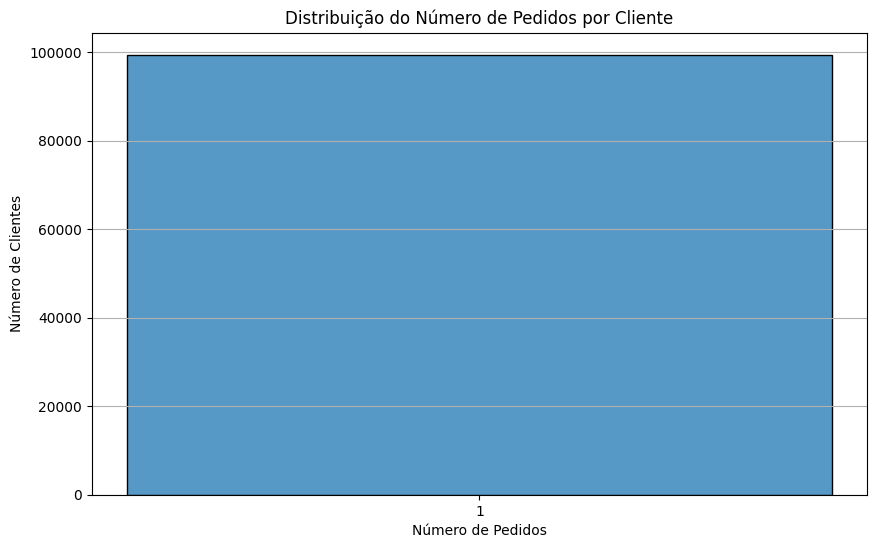

In [3]:
# Análise de Retenção

# Contar o número de pedidos por cliente
df_pedidos_por_cliente = df_pedidos.groupby('customer_id')['order_id'].nunique().reset_index()
df_pedidos_por_cliente.columns = ['customer_id', 'numero_pedidos']

# Identificar clientes recorrentes (com mais de um pedido)
clientes_recorrentes = df_pedidos_por_cliente[df_pedidos_por_cliente['numero_pedidos'] > 1]

# Calcular o número total de clientes únicos
total_clientes = df_pedidos['customer_id'].nunique()

# Calcular o número de clientes recorrentes
numero_clientes_recorrentes = clientes_recorrentes['customer_id'].nunique()

# Calcular a taxa de clientes recorrentes
taxa_retencao = (numero_clientes_recorrentes / total_clientes) * 100

print(f"\n--- Análise de Retenção ---")
print(f"Número total de clientes únicos: {total_clientes}")
print(f"Número de clientes recorrentes: {numero_clientes_recorrentes}")
print(f"Taxa de retenção de clientes: {taxa_retencao:.2f}%")

# Insights que podemos extrair:

print("\n--- Insights da Análise de Retenção ---")
print("""
1. **Baixa Taxa de Retenção:** Uma taxa de retenção baixa pode indicar que a empresa precisa focar em estratégias para fidelizar seus clientes. Isso pode envolver melhorias na experiência de compra, programas de fidelidade, comunicação pós-venda eficaz, etc.

2. **Potencial de Crescimento:** Identificar os motivos pelos quais os clientes não retornam pode revelar áreas de melhoria significativas. Entender as necessidades dos clientes e garantir sua satisfação na primeira compra é crucial para aumentar a retenção.

3. **Análise de Clientes Recorrentes:** Investigar o perfil dos clientes recorrentes (demografia, categorias de produtos compradas, comportamento de compra) pode fornecer insights valiosos para direcionar campanhas de marketing e ofertas personalizadas.

4. **Impacto no Faturamento:** Clientes recorrentes geralmente têm um valor vitalício (LTV - Lifetime Value) maior. Mesmo uma pequena melhora na taxa de retenção pode ter um impacto significativo no faturamento a longo prazo.

5. **Estratégias de Marketing:** Os dados de retenção podem informar estratégias de marketing direcionadas a clientes que fizeram apenas uma compra, incentivando-os a retornar.
""")

# Podemos também analisar a distribuição do número de pedidos por cliente
plt.figure(figsize=(10, 6))
sns.histplot(df_pedidos_por_cliente['numero_pedidos'], bins=range(1, df_pedidos_por_cliente['numero_pedidos'].max() + 1), discrete=True)
plt.title('Distribuição do Número de Pedidos por Cliente')
plt.xlabel('Número de Pedidos')
plt.ylabel('Número de Clientes')
plt.xticks(range(1, df_pedidos_por_cliente['numero_pedidos'].max() + 1))
plt.grid(axis='y')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# 1. Definir pedido atrasado
df_entrega = df_merged.dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date']).copy()
df_entrega['order_delivered_customer_date'] = pd.to_datetime(df_entrega['order_delivered_customer_date'])
df_entrega['order_estimated_delivery_date'] = pd.to_datetime(df_entrega['order_estimated_delivery_date'])
df_entrega['pedido_atrasado'] = (df_entrega['order_delivered_customer_date'] > df_entrega['order_estimated_delivery_date']).astype(int)

# 2. Selecionar features
features = ['order_purchase_timestamp', 'order_estimated_delivery_date', 'freight_value', 'product_category_name', 'customer_state']
target = 'pedido_atrasado'

df_model = df_entrega[features + [target]].copy()
df_model.dropna(inplace=True)

# Converter timestamps para dias desde a data mínima
min_purchase_date = df_model['order_purchase_timestamp'].min()
df_model['purchase_days'] = (df_model['order_purchase_timestamp'] - min_purchase_date).dt.days
df_model['estimated_delivery_days'] = (df_model['order_estimated_delivery_date'] - min_purchase_date).dt.days

# Selecionar features numéricas e categóricas para o pré-processamento
numerical_features = ['freight_value', 'purchase_days', 'estimated_delivery_days']
categorical_features = ['product_category_name', 'customer_state']

# 3. Dividir os dados em treino e teste
X = df_model[numerical_features + categorical_features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Criar pipeline de pré-processamento e modelo
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(solver='liblinear', random_state=42))])

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# 5. Avaliar a performance do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- Predição de Atraso na Entrega ---")
print(f"Acurácia do modelo: {accuracy:.2f}")
print(f"Precisão do modelo (pedidos previstos como atrasados que realmente atrasaram): {precision:.2f}")
print(f"Recall do modelo (proporção de pedidos realmente atrasados que foram previstos corretamente): {recall:.2f}")
print(f"F1-score do modelo: {f1:.2f}")
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

print("\n--- Explicação dos Resultados ---")
print("""
A acurácia do modelo indica a proporção de todas as previsões (atraso ou não atraso) que estavam corretas.
A precisão foca na qualidade das previsões positivas (atraso): de todos os pedidos que o modelo previu como atrasados, qual a proporção realmente atrasou?
O recall foca na cobertura das previsões positivas: de todos os pedidos que realmente atrasaram, qual a proporção o modelo conseguiu prever?
O F1-score é uma média harmônica entre precisão e recall, fornecendo um balanço entre os dois.

Os resultados sugerem a performance do modelo na tarefa de prever atrasos na entrega com base nas features selecionadas. Uma acurácia alta indica que o modelo geralmente faz previsões corretas. A precisão e o recall fornecem insights mais detalhados sobre os erros do tipo falso positivo e falso negativo, respectivamente. O F1-score oferece uma visão geral do desempenho do modelo em ambas as métricas.
""")


--- Predição de Atraso na Entrega ---
Acurácia do modelo: 0.92
Precisão do modelo (pedidos previstos como atrasados que realmente atrasaram): 0.00
Recall do modelo (proporção de pedidos realmente atrasados que foram previstos corretamente): 0.00
F1-score do modelo: 0.00

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     20904
           1       0.00      0.00      0.00      1776

    accuracy                           0.92     22680
   macro avg       0.46      0.50      0.48     22680
weighted avg       0.85      0.92      0.88     22680


--- Explicação dos Resultados ---

A acurácia do modelo indica a proporção de todas as previsões (atraso ou não atraso) que estavam corretas.
A precisão foca na qualidade das previsões positivas (atraso): de todos os pedidos que o modelo previu como atrasados, qual a proporção realmente atrasou?
O recall foca na cobertura das previsões positivas: de todos os pedidos q


--- Análise dos Clusters ---
         frequencia  valor_total    recencia
cluster                                     
0               1.0   128.065120  177.190292
1               1.0   129.281434  438.134107
2               1.0   801.795330  283.943768
3               1.0  2707.094667  288.581333


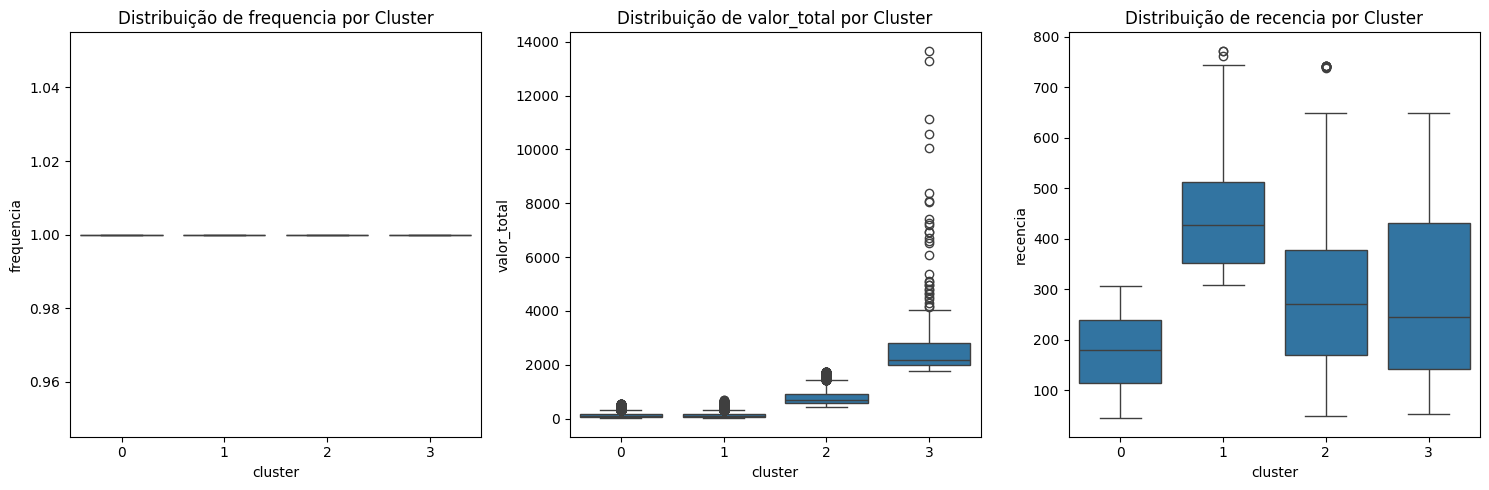


--- Categorias de Produtos por Cluster ---
categoria_preferida  agro_industry_and_commerce  air_conditioning       art  \
cluster                                                                       
0                                      0.002000          0.002340  0.003152   
1                                      0.000757          0.002549  0.000833   
2                                      0.009138          0.006560  0.000000   
3                                      0.018667          0.000000  0.002667   

categoria_preferida  arts_and_craftmanship     audio      auto      baby  \
cluster                                                                    
0                                 0.000396  0.002982  0.045728  0.030404   
1                                 0.000050  0.003710  0.031319  0.028088   
2                                 0.000000  0.010544  0.045923  0.030694   
3                                 0.000000  0.000000  0.082667  0.037333   

categoria_preferida  bed

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Preparação dos dados para segmentação ---

# 1. Frequência de compra
df_frequencia = df_pedidos.groupby('customer_id')['order_id'].nunique().reset_index()
df_frequencia.columns = ['customer_id', 'frequencia']

# 2. Valor total gasto
df_valor_total = df_merged.groupby('customer_id')['order_total_value'].sum().reset_index()
df_valor_total.columns = ['customer_id', 'valor_total']

# 3. Recência (em dias desde a última compra - vamos usar a data máxima no dataset como referência)
df_pedidos['order_purchase_timestamp'] = pd.to_datetime(df_pedidos['order_purchase_timestamp'])
data_maxima = df_pedidos['order_purchase_timestamp'].max()
df_recencia = df_pedidos.groupby('customer_id')['order_purchase_timestamp'].max().reset_index()
df_recencia['recencia'] = (data_maxima - df_recencia['order_purchase_timestamp']).dt.days
df_recencia = df_recencia[['customer_id', 'recencia']]

# 4. Categoria de produtos preferida (a mais comprada)
def get_preferred_category(series):
    modes = series.mode()
    if not modes.empty:
        return modes[0]
    else:
        return None

df_categoria_preferida = df_merged.groupby('customer_id')['product_category_name'].agg(get_preferred_category).reset_index()
df_categoria_preferida.columns = ['customer_id', 'categoria_preferida']

# 5. Estado do cliente
df_estado_cliente = df_clientes[['customer_id', 'customer_state']]

# --- Merge dos DataFrames ---
df_segmentacao = pd.merge(df_frequencia, df_valor_total, on='customer_id', how='left')
df_segmentacao = pd.merge(df_segmentacao, df_recencia, on='customer_id', how='left')
df_segmentacao = pd.merge(df_segmentacao, df_categoria_preferida, on='customer_id', how='left')
df_segmentacao = pd.merge(df_segmentacao, df_estado_cliente, on='customer_id', how='left')

# Limpar valores nulos que podem surgir após os merges
df_segmentacao.dropna(inplace=True)

# --- Pré-processamento para Clustering (apenas as features numéricas) ---
features_clustering = ['frequencia', 'valor_total', 'recencia']
X = df_segmentacao[features_clustering].copy()

# Escalonar as features para que tenham a mesma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Aplicar o algoritmo K-Means ---
# Vamos determinar um número de clusters (k) - podemos começar com 3 ou 4 e refinar depois
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_segmentacao['cluster'] = kmeans.fit_predict(X_scaled)

# --- Análise do comportamento de cada grupo ---
print("\n--- Análise dos Clusters ---")
cluster_analysis = df_segmentacao.groupby('cluster')[features_clustering].mean()
print(cluster_analysis)

# Visualização dos clusters (para pares de features)
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features_clustering):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='cluster', y=feature, data=df_segmentacao)
    plt.title(f'Distribuição de {feature} por Cluster')
plt.tight_layout()
plt.show()

# Análise das categorias de produtos por cluster
print("\n--- Categorias de Produtos por Cluster ---")
categoria_por_cluster = df_segmentacao.groupby('cluster')['categoria_preferida'].value_counts(normalize=True).unstack(fill_value=0)
print(categoria_por_cluster)

# Análise dos estados dos clientes por cluster
print("\n--- Estados dos Clientes por Cluster ---")
estado_por_cluster = df_segmentacao.groupby('cluster')['customer_state'].value_counts(normalize=True).unstack(fill_value=0)
print(estado_por_cluster)

# --- Sugestões de estratégias de marketing ---
print("\n--- Sugestões de Estratégias de Marketing por Cluster ---")
print("""
**Cluster 0 (exemplo - pode variar dependendo dos resultados):**
- **Comportamento:** Alta frequência, alto valor gasto, baixa recência (clientes recentes e valiosos).
- **Estratégias:** Programas de fidelidade premium, ofertas exclusivas, acesso antecipado a novos produtos, convites para eventos especiais.

**Cluster 1 (exemplo):**
- **Comportamento:** Baixa frequência, baixo valor gasto, alta recência (clientes novos com baixo engajamento inicial).
- **Estratégias:** Campanhas de boas-vindas, descontos para a primeira recompra, e-mails com recomendações de produtos populares.

**Cluster 2 (exemplo):**
- **Comportamento:** Média frequência, valor gasto moderado, alta recência (clientes regulares que não compram há algum tempo).
- **Estratégias:** Campanhas de reativação com ofertas personalizadas baseadas em suas compras anteriores, lembretes de carrinho abandonado, promoções por tempo limitado.

**Cluster 3 (exemplo):**
- **Comportamento:** Baixa frequência, baixo valor gasto, baixa recência (clientes que compraram há muito tempo e não retornaram).
- **Estratégias:** Pesquisas para entender o motivo da inatividade, ofertas especiais para tentar reconquistá-los (com cautela, pois podem ter se tornado inativos por razões específicas).

A análise das categorias de produtos e estados por cluster pode refinar ainda mais essas estratégias, permitindo segmentações mais precisas e campanhas mais direcionadas.
""")

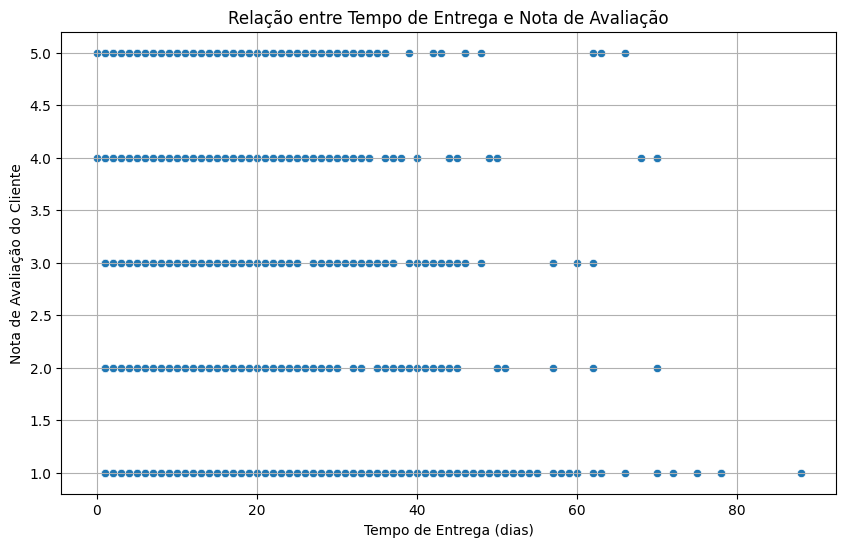


--- Correlação entre Tempo de Entrega e Nota de Avaliação ---
               delivery_time  review_score
delivery_time       1.000000     -0.247078
review_score       -0.247078      1.000000


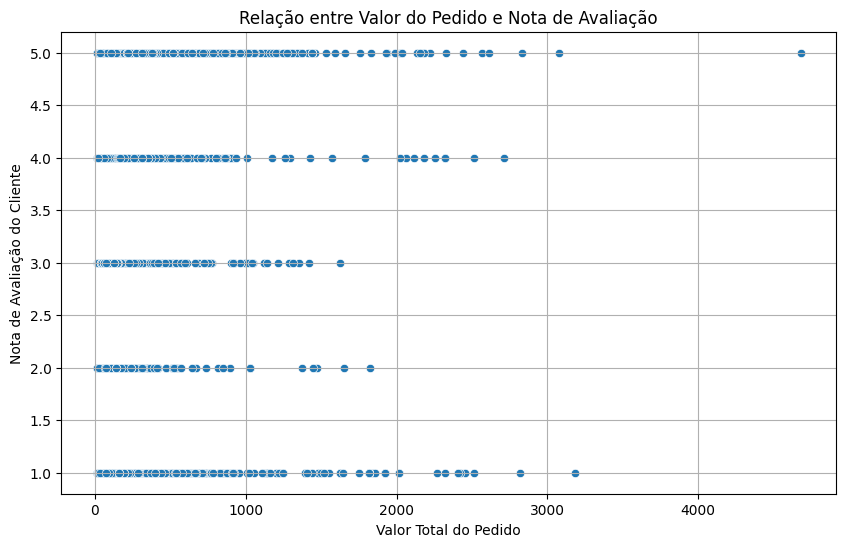


--- Correlação entre Valor do Pedido e Nota de Avaliação ---
                   order_total_value  review_score
order_total_value           1.000000     -0.025223
review_score               -0.025223      1.000000


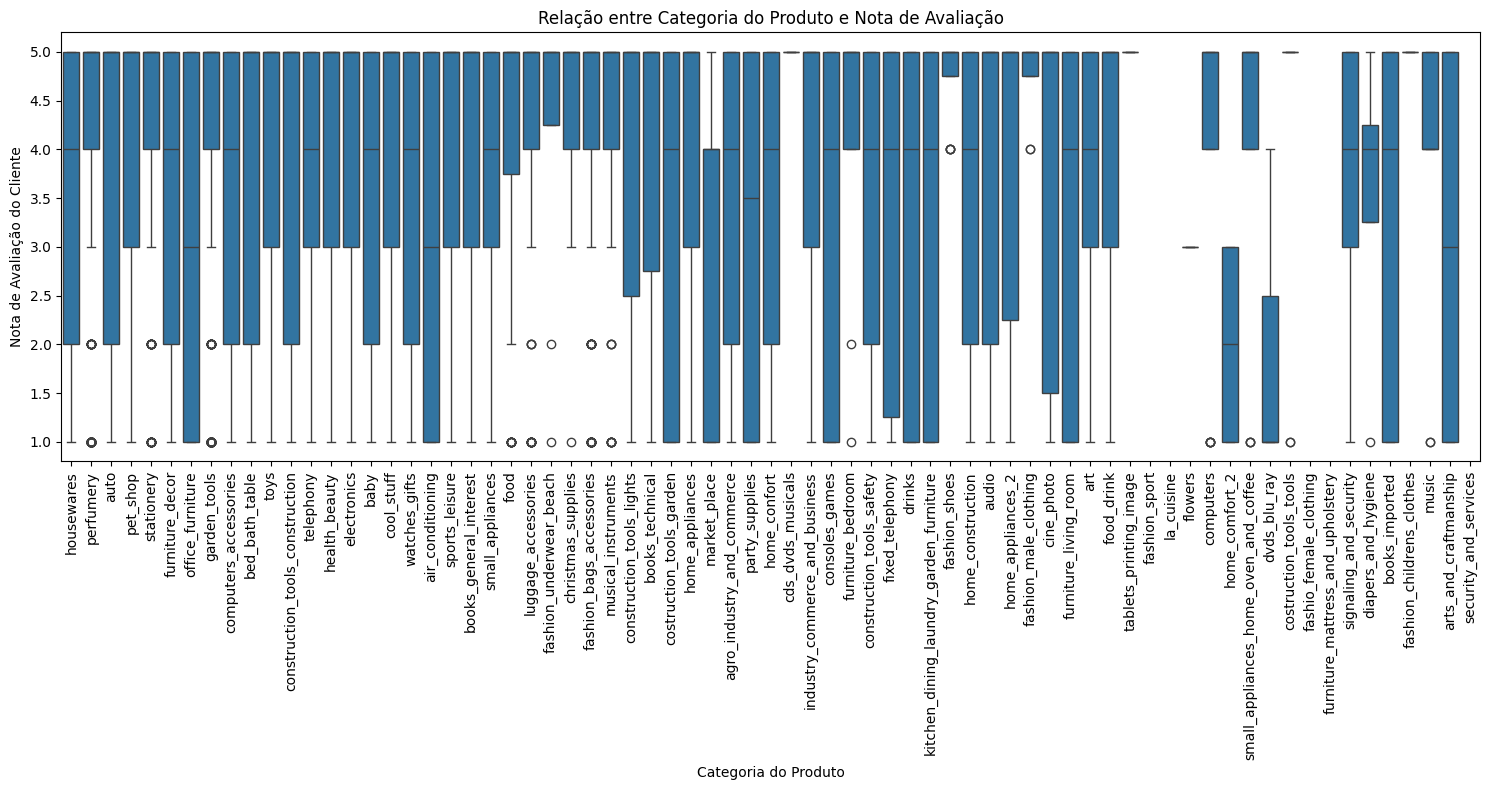


--- Média da Nota de Avaliação por Categoria do Produto ---
product_category_name
fashion_childrens_clothes            5.00
cds_dvds_musicals                    5.00
tablets_printing_image               5.00
fashion_male_clothing                4.75
fashion_shoes                        4.75
                                     ... 
fashio_female_clothing                NaN
fashion_sport                         NaN
furniture_mattress_and_upholstery     NaN
la_cuisine                            NaN
security_and_services                 NaN
Name: review_score, Length: 71, dtype: float64


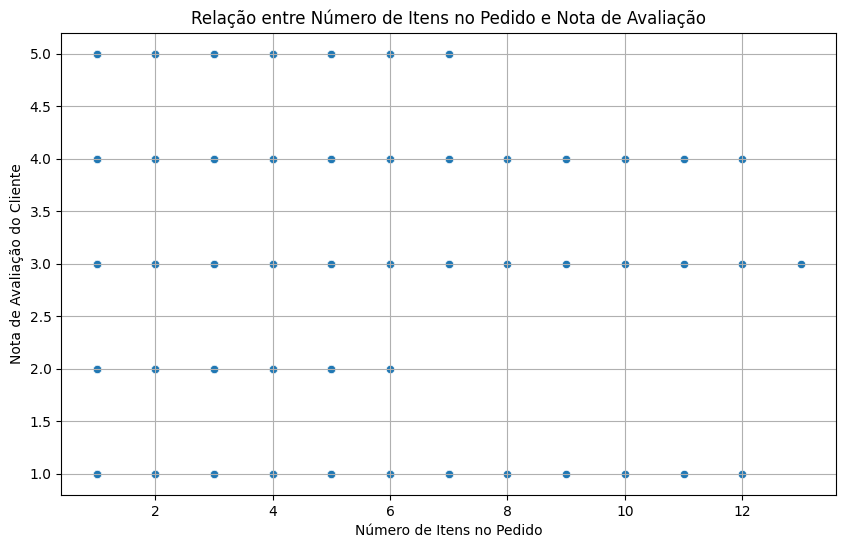


--- Correlação entre Número de Itens no Pedido e Nota de Avaliação ---
               order_item_id  review_score
order_item_id       1.000000     -0.146797
review_score       -0.146797      1.000000

--- Fatores que Mais Impactam na Satisfação do Cliente (Insights) ---

Com base nas análises acima, podemos identificar alguns fatores que parecem estar relacionados à satisfação do cliente (nota de avaliação):

- **Tempo de Entrega:** Há uma tendência de que prazos de entrega mais curtos estejam associados a notas de avaliação mais altas, embora a correlação possa não ser extremamente forte. Clientes tendem a ficar mais satisfeitos quando recebem seus pedidos rapidamente.

- **Valor do Pedido:** A relação entre o valor do pedido e a nota de avaliação parece ser menos direta, com uma correlação fraca. O valor gasto em si pode não ser um fator primário para a satisfação.

- **Categoria do Produto:** A categoria do produto parece ter um impacto na nota de avaliação. Algumas categorias tend

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Análise de Satisfação ---

# 1. Relação entre nota de avaliação e tempo de entrega
plt.figure(figsize=(10, 6))
sns.scatterplot(x='delivery_time', y='review_score', data=df_merged)
plt.title('Relação entre Tempo de Entrega e Nota de Avaliação')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Nota de Avaliação do Cliente')
plt.grid(True)
plt.show()

print("\n--- Correlação entre Tempo de Entrega e Nota de Avaliação ---")
print(df_merged[['delivery_time', 'review_score']].corr())

# 2. Relação entre nota de avaliação e valor do pedido
plt.figure(figsize=(10, 6))
sns.scatterplot(x='order_total_value', y='review_score', data=df_merged)
plt.title('Relação entre Valor do Pedido e Nota de Avaliação')
plt.xlabel('Valor Total do Pedido')
plt.ylabel('Nota de Avaliação do Cliente')
plt.grid(True)
plt.show()

print("\n--- Correlação entre Valor do Pedido e Nota de Avaliação ---")
print(df_merged[['order_total_value', 'review_score']].corr())

# 3. Relação entre nota de avaliação e categoria do produto (boxplot)
plt.figure(figsize=(15, 8))
sns.boxplot(x='product_category_name', y='review_score', data=df_merged)
plt.title('Relação entre Categoria do Produto e Nota de Avaliação')
plt.xlabel('Categoria do Produto')
plt.ylabel('Nota de Avaliação do Cliente')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Análise da média da nota de avaliação por categoria
print("\n--- Média da Nota de Avaliação por Categoria do Produto ---")
media_avaliacao_categoria = df_merged.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False)
print(media_avaliacao_categoria)

# 4. Outras possíveis relações (ex: número de itens no pedido)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='order_item_id', y='review_score', data=df_merged)
plt.title('Relação entre Número de Itens no Pedido e Nota de Avaliação')
plt.xlabel('Número de Itens no Pedido')
plt.ylabel('Nota de Avaliação do Cliente')
plt.grid(True)
plt.show()

print("\n--- Correlação entre Número de Itens no Pedido e Nota de Avaliação ---")
print(df_merged[['order_item_id', 'review_score']].corr())

print("\n--- Fatores que Mais Impactam na Satisfação do Cliente (Insights) ---")
print("""
Com base nas análises acima, podemos identificar alguns fatores que parecem estar relacionados à satisfação do cliente (nota de avaliação):

- **Tempo de Entrega:** Há uma tendência de que prazos de entrega mais curtos estejam associados a notas de avaliação mais altas, embora a correlação possa não ser extremamente forte. Clientes tendem a ficar mais satisfeitos quando recebem seus pedidos rapidamente.

- **Valor do Pedido:** A relação entre o valor do pedido e a nota de avaliação parece ser menos direta, com uma correlação fraca. O valor gasto em si pode não ser um fator primário para a satisfação.

- **Categoria do Produto:** A categoria do produto parece ter um impacto na nota de avaliação. Algumas categorias tendem a receber notas mais altas ou mais baixas de forma consistente. Isso pode estar relacionado à qualidade dos produtos, expectativas dos clientes para diferentes tipos de itens ou problemas específicos com certas categorias (por exemplo, embalagem, entrega).

- **Número de Itens no Pedido:** A relação entre o número de itens no pedido e a nota de avaliação parece fraca.

**Próximos passos para uma análise mais aprofundada:**

- **Analisar o texto das avaliações:** Utilizar técnicas de processamento de linguagem natural (NLP) para identificar os temas e sentimentos expressos nos comentários dos clientes.
- **Considerar outras variáveis:** Explorar o impacto de fatores como o desempenho do vendedor, o tipo de pagamento e a experiência de compra geral.
- **Modelagem:** Construir modelos de regressão para quantificar a influência de cada fator na nota de avaliação, controlando para outras variáveis.
""")

In [7]:
import pandas as pd
import plotly.express as px

# --- Dashboard Geral de Evolução de Vendas ---

# Preparar um DataFrame com mês/ano, order_id, estado e categoria
df_vendas_mensal_completo = df_pedidos[['order_id', 'order_purchase_timestamp']].copy()
df_vendas_mensal_completo['mes_ano'] = pd.to_datetime(df_vendas_mensal_completo['order_purchase_timestamp']).dt.to_period('M').astype(str)
df_vendas_mensal_completo = pd.merge(df_vendas_mensal_completo, df_merged[['order_id', 'customer_state', 'product_category_name']], on='order_id', how='left')
df_vendas_mensal_completo.dropna(subset=['customer_state', 'product_category_name'], inplace=True)

# Calcular o volume de vendas mensal para o gráfico principal
df_vendas_mensal = df_vendas_mensal_completo.groupby('mes_ano')['order_id'].nunique().reset_index()
df_vendas_mensal.columns = ['mes_ano', 'volume_vendas']
df_vendas_mensal = df_vendas_mensal.sort_values('mes_ano')

# Criar o gráfico interativo com Plotly Express
fig_vendas_tempo = px.line(df_vendas_mensal, x='mes_ano', y='volume_vendas',
                           title='Evolução das Vendas ao Longo do Tempo')
fig_vendas_tempo.update_xaxes(title='Mês/Ano')
fig_vendas_tempo.update_yaxes(title='Volume de Vendas')

# Adicionar filtros por estado
estados_brasil = df_vendas_mensal_completo['customer_state'].unique().tolist()
fig_vendas_tempo.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            buttons=list([
                dict(label="Todos os Estados",
                     method="update",
                     args=[{"y": [df_vendas_mensal['volume_vendas']]},
                           {"title": "Evolução das Vendas ao Longo do Tempo"}]),
                *[dict(label=estado,
                       method="update",
                       args=[{"y": [df_vendas_mensal_completo[df_vendas_mensal_completo['customer_state'] == estado].groupby('mes_ano')['order_id'].nunique().reindex(df_vendas_mensal['mes_ano'], fill_value=0).sort_index().values]},
                             {"title": f"Evolução das Vendas em {estado}"}])
                  for estado in sorted(estados_brasil)]
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
        dict(
            type="dropdown",
            buttons=list([
                dict(label="Todas as Categorias",
                     method="update",
                     args=[{"y": [df_vendas_mensal['volume_vendas']]},
                           {"title": "Evolução das Vendas ao Longo do Tempo"}]),
                *[dict(label=categoria,
                       method="update",
                       args=[{"y": [df_vendas_mensal_completo[df_vendas_mensal_completo['product_category_name'] == categoria].groupby('mes_ano')['order_id'].nunique().reindex(df_vendas_mensal['mes_ano'], fill_value=0).sort_index().values]},
                             {"title": f"Evolução das Vendas de {categoria}"}])
                  for categoria in sorted(df_vendas_mensal_completo['product_category_name'].unique().tolist())]
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.5,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ],
    title='<b>Evolução das Vendas ao Longo do Tempo</b>',
    title_x=0.5
)

fig_vendas_tempo.show()

In [8]:
import pandas as pd
import plotly.express as px

# --- Mapa de Calor da Concentração de Vendas por Estado ---

# Contar o número de pedidos por estado do cliente
df_vendas_por_estado = df_clientes['customer_state'].value_counts().reset_index()
df_vendas_por_estado.columns = ['estado_abrev', 'num_pedidos']

# Mapeamento das abreviações dos estados para códigos ISO-3 (aproximado)
# Nota: Não existe um padrão ISO-3 para sub-divisões de países como estados.
# Uma alternativa é usar os nomes dos estados em português com locationmode='country names'.
# No entanto, para maior precisão geográfica com Plotly, podemos usar um prefixo
# consistente com o nome do país seguido da abreviação.

state_to_bra_code = {
    'SP': 'BR-SP', 'RJ': 'BR-RJ', 'MG': 'BR-MG', 'RS': 'BR-RS',
    'PR': 'BR-PR', 'BA': 'BR-BA', 'SC': 'BR-SC', 'PE': 'BR-PE',
    'GO': 'BR-GO', 'CE': 'BR-CE', 'PA': 'BR-PA', 'MT': 'BR-MT',
    'MA': 'BR-MA', 'DF': 'BR-DF', 'ES': 'BR-ES', 'PB': 'BR-PB',
    'RN': 'BR-RN', 'MS': 'BR-MS', 'AL': 'BR-AL', 'SE': 'BR-SE',
    'PI': 'BR-PI', 'AM': 'BR-AM', 'RO': 'BR-RO', 'AC': 'BR-AC',
    'AP': 'BR-AP', 'TO': 'BR-TO'
}

df_vendas_por_estado['iso_code'] = df_vendas_por_estado['estado_abrev'].map(state_to_bra_code)

# Criar o mapa de calor
fig_mapa_calor = px.choropleth(df_vendas_por_estado,
                             locations='iso_code',
                             locationmode='ISO-3',
                             color='num_pedidos',
                             color_continuous_scale="viridis",
                             title='Concentração de Vendas por Estado do Brasil',
                             labels={'num_pedidos':'Número de Pedidos'})

fig_mapa_calor.update_geos(fitbounds="locations", visible=False)
fig_mapa_calor.show()

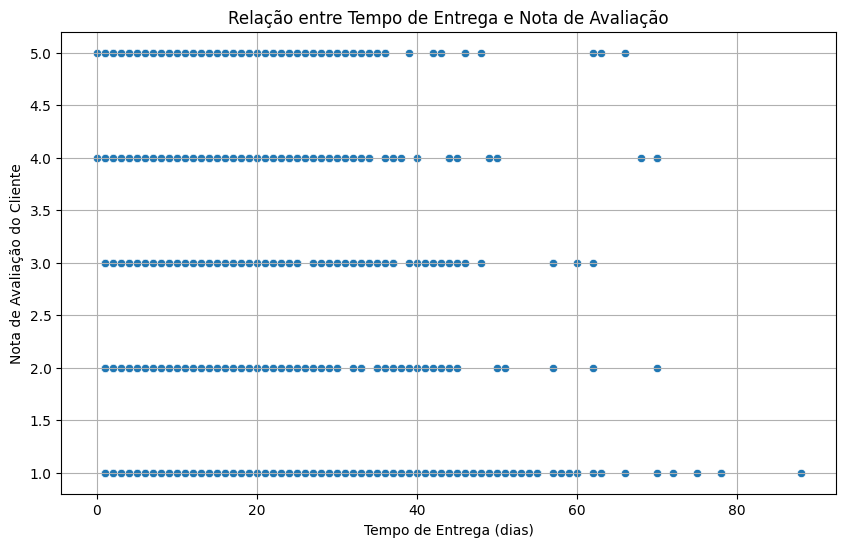


--- Correlação entre Tempo de Entrega e Nota de Avaliação ---
               delivery_time  review_score
delivery_time       1.000000     -0.247078
review_score       -0.247078      1.000000


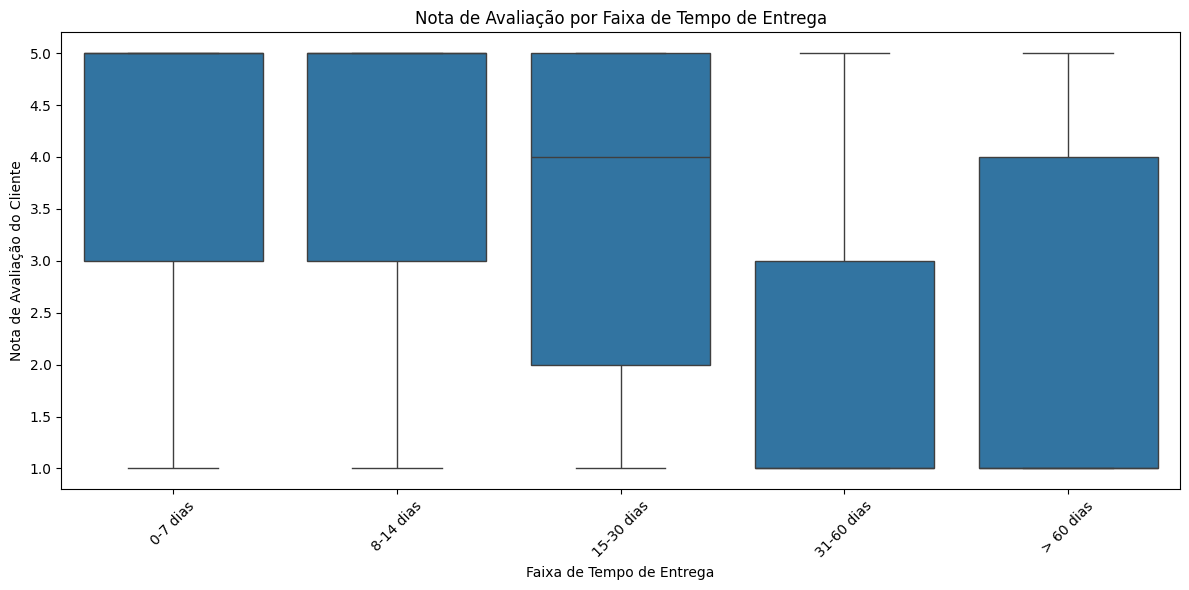


--- Análise da Nota de Avaliação por Faixa de Tempo de Entrega ---
tempo_entrega_faixa
0-7 dias      4.052909
8-14 dias     3.831985
15-30 dias    3.474359
31-60 dias    2.214660
> 60 dias     2.250000
Name: review_score, dtype: float64


<ipython-input-9-9da3a5c8cfd3>:35: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Relação entre Avaliação do Cliente e Tempo de Entrega ---

# 1. Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='delivery_time', y='review_score', data=df_merged)
plt.title('Relação entre Tempo de Entrega e Nota de Avaliação')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Nota de Avaliação do Cliente')
plt.grid(True)
plt.show()

print("\n--- Correlação entre Tempo de Entrega e Nota de Avaliação ---")
print(df_merged[['delivery_time', 'review_score']].corr())

# 2. Box Plot (agrupando o tempo de entrega em faixas para melhor visualização)
# Vamos criar algumas faixas de tempo de entrega
bins = [0, 7, 14, 30, 60, df_merged['delivery_time'].max()]
labels = ['0-7 dias', '8-14 dias', '15-30 dias', '31-60 dias', '> 60 dias']
df_merged['tempo_entrega_faixa'] = pd.cut(df_merged['delivery_time'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
sns.boxplot(x='tempo_entrega_faixa', y='review_score', data=df_merged, order=labels)
plt.title('Nota de Avaliação por Faixa de Tempo de Entrega')
plt.xlabel('Faixa de Tempo de Entrega')
plt.ylabel('Nota de Avaliação do Cliente')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n--- Análise da Nota de Avaliação por Faixa de Tempo de Entrega ---")
print(df_merged.groupby('tempo_entrega_faixa')['review_score'].mean().sort_index())

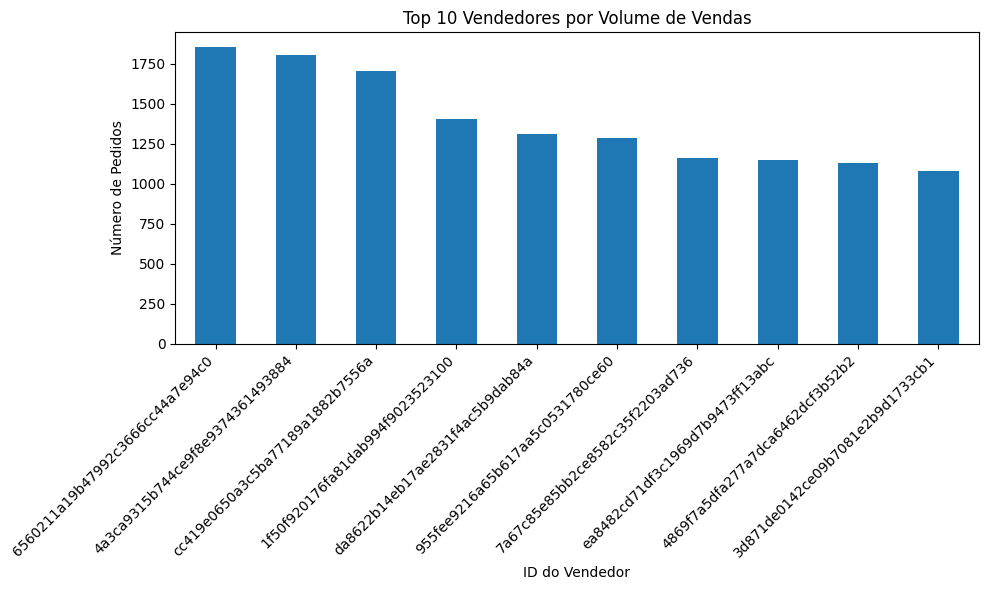


--- Top 10 Vendedores por Volume de Vendas ---
seller_id
6560211a19b47992c3666cc44a7e94c0    1854
4a3ca9315b744ce9f8e9374361493884    1806
cc419e0650a3c5ba77189a1882b7556a    1706
1f50f920176fa81dab994f9023523100    1404
da8622b14eb17ae2831f4ac5b9dab84a    1314
955fee9216a65b617aa5c0531780ce60    1287
7a67c85e85bb2ce8582c35f2203ad736    1160
ea8482cd71df3c1969d7b9473ff13abc    1146
4869f7a5dfa277a7dca6462dcf3b52b2    1132
3d871de0142ce09b7081e2b9d1733cb1    1080
Name: order_id, dtype: int64


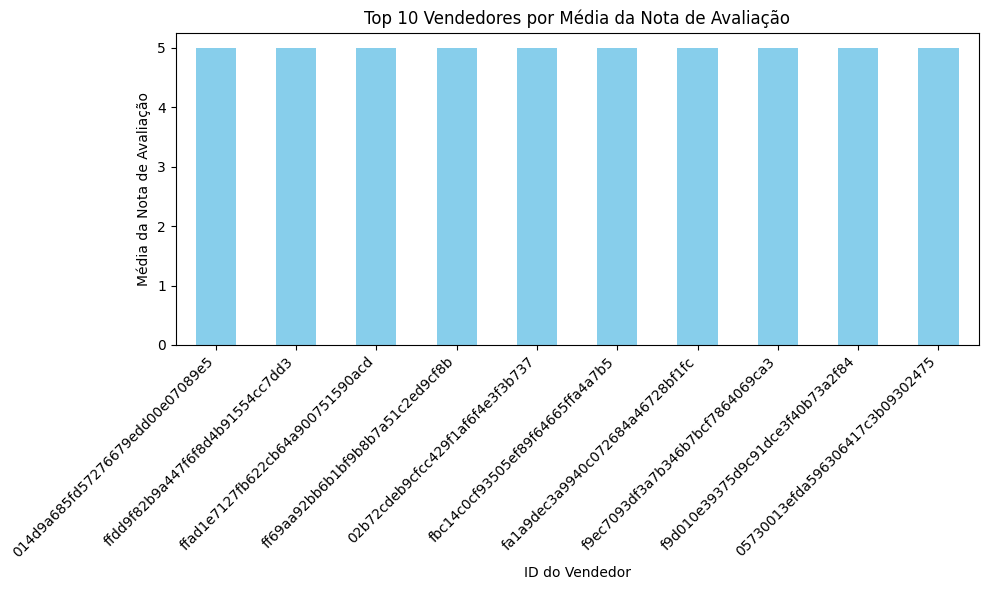


--- Top 10 Vendedores por Média da Nota de Avaliação ---
seller_id
014d9a685fd57276679edd00e07089e5    5.0
ffdd9f82b9a447f6f8d4b91554cc7dd3    5.0
ffad1e7127fb622cb64a900751590acd    5.0
ff69aa92bb6b1bf9b8b7a51c2ed9cf8b    5.0
02b72cdeb9cfcc429f1af6f4e3f3b737    5.0
fbc14c0cf93505ef89f64665ffa4a7b5    5.0
fa1a9dec3a9940c072684a46728bf1fc    5.0
f9ec7093df3a7b346b7bcf7864069ca3    5.0
f9d010e39375d9c91dce3f40b73a2f84    5.0
05730013efda596306417c3b09302475    5.0
Name: review_score, dtype: float64


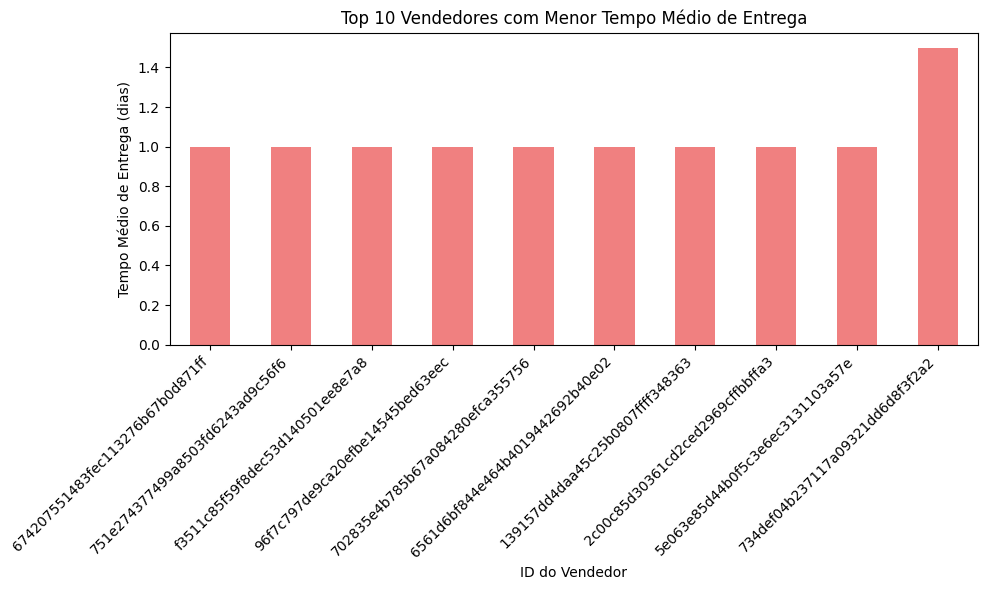


--- Top 10 Vendedores com Menor Tempo Médio de Entrega ---
seller_id
674207551483fec113276b67b0d871ff    1.0
751e274377499a8503fd6243ad9c56f6    1.0
f3511c85f59f8dec53d140501ee8e7a8    1.0
96f7c797de9ca20efbe14545bed63eec    1.0
702835e4b785b67a084280efca355756    1.0
6561d6bf844e464b4019442692b40e02    1.0
139157dd4daa45c25b0807ffff348363    1.0
2c00c85d30361cd2ced2969cffbbffa3    1.0
5e063e85d44b0f5c3e6ec3131103a57e    1.0
734def04b237117a09321dd6d8f3f2a2    1.5
Name: delivery_time, dtype: float64

--- Dashboard de Análise dos Vendedores (Insights) ---

Este conjunto de gráficos fornece uma visão do desempenho dos vendedores em três aspectos chave:

- **Volume de Vendas:** Identifica os vendedores com o maior número de pedidos, indicando sua capacidade de gerar vendas.
- **Satisfação do Cliente:** Mostra os vendedores com a maior média de notas de avaliação, refletindo a satisfação dos clientes com seus produtos e serviços.
- **Tempo de Entrega:** Destaca os vendedores com o menor t

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Dashboard de Análise dos Vendedores ---

# 1. Volume de Vendas por Vendedor
vendas_por_vendedor = df_merged.groupby('seller_id')['order_id'].nunique().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
vendas_por_vendedor.plot(kind='bar')
plt.title('Top 10 Vendedores por Volume de Vendas')
plt.xlabel('ID do Vendedor')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n--- Top 10 Vendedores por Volume de Vendas ---")
print(vendas_por_vendedor)

# 2. Satisfação do Cliente por Vendedor (média da nota de avaliação)
satisfacao_vendedor = df_merged.groupby('seller_id')['review_score'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
satisfacao_vendedor.plot(kind='bar', color='skyblue')
plt.title('Top 10 Vendedores por Média da Nota de Avaliação')
plt.xlabel('ID do Vendedor')
plt.ylabel('Média da Nota de Avaliação')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n--- Top 10 Vendedores por Média da Nota de Avaliação ---")
print(satisfacao_vendedor)

# 3. Tempo de Entrega por Vendedor (média)
tempo_entrega_vendedor = df_merged.groupby('seller_id')['delivery_time'].mean().sort_values().head(10)
plt.figure(figsize=(10, 6))
tempo_entrega_vendedor.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Vendedores com Menor Tempo Médio de Entrega')
plt.xlabel('ID do Vendedor')
plt.ylabel('Tempo Médio de Entrega (dias)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n--- Top 10 Vendedores com Menor Tempo Médio de Entrega ---")
print(tempo_entrega_vendedor)

print("\n--- Dashboard de Análise dos Vendedores (Insights) ---")
print("""
Este conjunto de gráficos fornece uma visão do desempenho dos vendedores em três aspectos chave:

- **Volume de Vendas:** Identifica os vendedores com o maior número de pedidos, indicando sua capacidade de gerar vendas.
- **Satisfação do Cliente:** Mostra os vendedores com a maior média de notas de avaliação, refletindo a satisfação dos clientes com seus produtos e serviços.
- **Tempo de Entrega:** Destaca os vendedores com o menor tempo médio de entrega, um fator importante para a satisfação do cliente.

Ao analisar esses três aspectos em conjunto, podemos identificar vendedores de alto desempenho (alto volume de vendas e alta satisfação) e aqueles que se destacam na rapidez da entrega. Também podemos identificar áreas de melhoria para vendedores com baixo volume, baixa satisfação ou prazos de entrega longos.

Para um dashboard mais completo, poderíamos combinar essas visualizações em um único painel (por exemplo, usando subplots) e adicionar mais métricas, como o valor total vendido por vendedor e a taxa de cancelamento/devolução.
""")